In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q1

In [ ]:
def linear_interpolate(n, x_knots, y_knots, x_input):
    # Write your code here
    xy, lo, hi = sorted([x, y] for x, y in zip(x_knots, y_knots)), 0, n - 1
    while lo < hi:
        mi = (lo + hi) // 2
        if x_input <= xy[mi][0]:
            hi = mi
        else:
            lo = mi + 1
    if not hi:
        return xy[0][1] + (xy[1][1] - xy[0][1]) / (xy[1][0] - xy[0][0]) * (x_input - xy[0][0])
    if hi == n - 1 and xy[-1][0] < x_input:
        return xy[-1][1] + (xy[-1][1] - xy[-2][1]) / (xy[-1][0] - xy[-2][0]) * (x_input - xy[-1][0])
    return xy[hi][1] + (xy[hi][1] - xy[hi - 1][1]) / (xy[hi][0] - xy[hi - 1][0]) * (x_input - xy[hi][0])

In [80]:
n = 5
x_knots = [-2.0, -1.0, 0.0, 1.0, 2.0]
y_knots = [0.0, 10.0, 15.0, 0.0, 5.0]
x_input = -0.3

In [81]:
sorted([x, y] for x, y in zip(x_knots, y_knots))

[[-2.0, 0.0], [-1.0, 10.0], [0.0, 15.0], [1.0, 0.0], [2.0, 5.0]]

# Q2

In [5]:
df = pd.DataFrame([[70,95,34,46,10,50],
[65,88,45,24,32,51],
[87,91,23,35,10,78],
[67,101,34,55,15,88]], columns=['Town1','Town2','Town3','Town4','Town5','NYC']).astype(float)
df

,Town1,Town2,Town3,Town4,Town5,NYC
0,70.0,95.0,34.0,46.0,10.0,50.0
1,65.0,88.0,45.0,24.0,32.0,51.0
2,87.0,91.0,23.0,35.0,10.0,78.0
3,67.0,101.0,34.0,55.0,15.0,88.0


In [78]:
# Q1
q1_answer = df.std().idxmax()

# Q2
q2_answer = str(int(round(df[(df.Town2 >= 90) & (df.Town2 <= 100)].NYC.median())))

# Q3
model = LinearRegression()
mse = {}
abs_sum = 0
town_list = [x for x in df.columns.tolist() if x != 'NYC']
for town in town_list:
    model.fit(df[town].values.reshape(-1, 1), df['NYC'].values)
    mse[town] = mean_squared_error(df['NYC'].values, model.predict(df[town].values.reshape(-1, 1)))
    abs_sum += abs(model.coef_[0])

q3_answer = str(int(round(abs_sum)))

# Q4
q4_answer = min(mse, key=mse.get)

# Q5
combination = []
for i in range(len(town_list)):
    for j in town_list[i + 1:]:
        combination.append([town_list[i], j])

new_mse = {}
for i in range(len(combination)):
    model.fit(df[combination[i]].values, df['NYC'].values)
    new_mse[i] = mean_squared_error(df['NYC'].values, model.predict(df[combination[i]].values))

q5_answer = combination[min(new_mse, key=new_mse.get)]
q5_answer = ','.join(q5_answer)

# Final Return
answer = [q1_answer, q2_answer, q3_answer, q4_answer, q5_answer]
# return ','.join(answer)

In [79]:
','.join(answer)

'NYC,64,5,Town2,Town1,Town2'

# Q3

In [96]:
%matplotlib inline

In [87]:
df = pd.DataFrame([[34,32,53,5,10,29,40],
[86,91,24,10,12,50,45],
[56,78,90,23,23,45,23],
[23,92,45,44,55,67,34],
[12,99,23,34,64,56,35],
[22,102,11,23,45,65,43]], columns=['Town1','Town2','Town3','Town4','Town5','Town6','NYC'
])

town_list = [x for x in df.columns.tolist() if x != 'NYC']


In [92]:
from sklearn import linear_model
import seaborn as sns

clf = linear_model.Lasso(alpha=0.1)

In [93]:
clf.fit(df[town_list].values, df.NYC.values)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
clf.coef_

array([ 0.05856669, -0.20044577, -0.30883531,  0.        , -0.11042872,
        0.24004036])

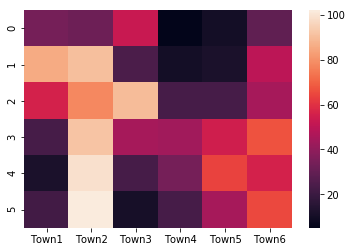

In [97]:
ax = sns.heatmap(df[town_list])

In [90]:
df[town_list].corr()

,Town1,Town2,Town3,Town4,Town5,Town6
Town1,1.000000,-0.098647,0.230360,-0.576555,-0.768697,-0.343684
Town2,-0.098647,1.000000,-0.488726,0.624262,0.663908,0.893835
Town3,0.230360,-0.488726,1.000000,-0.052580,-0.377881,-0.490965
Town4,-0.576555,0.624262,-0.052580,1.000000,0.891977,0.781086
Town5,-0.768697,0.663908,-0.377881,0.891977,1.000000,0.773206
Town6,-0.343684,0.893835,-0.490965,0.781086,0.773206,1.000000
